In [22]:
import pandas as pd
from pycaret.classification import*
from pycaret.classification import get_config

#1 carregando csc/dataset
df = pd.read_csv('meu_dataset_phishing.csv')

print("CSV carregado com sucesso!")
print("versão original(Inglês-EUA) do dataset:")
print(df.head())


CSV carregado com sucesso!
versão original(Inglês-EUA) do dataset:
   having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                 -1           1                   1                 1   
1                  1           1                   1                 1   
2                  1           0                   1                 1   
3                  1           0                   1                 1   
4                  1           0                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

 

In [23]:
dicionario_colunas = {
    'having_IP_Address': 'tem_endereco_ip',
    'URL_Length': 'comprimento_url',
    'Shortining_Service': 'servico_encurtamento',
    'having_At_Symbol': 'tem_simbolo_arroba',
    'double_slash_redirecting': 'redirecionamento_barra_dupla',
    'Prefix_Suffix': 'prefixo_sufixo',
    'having_Sub_Domain': 'tem_sub_dominio',
    'SSLfinal_State': 'estado_ssl_final',
    'Domain_registeration_length': 'duracao_registro_dominio',
    'Favicon': 'favicon',
    'port': 'porta_nao_padrao',
    'HTTPS_token': 'token_https_no_dominio',
    'Request_URL': 'url_requisicao_externa',
    'URL_of_Anchor': 'url_das_ancoras',
    'Links_in_tags': 'links_em_tags_meta',
    'SFH': 'sfh', # (Server Form Handler - pode manter assim)
    'Submitting_to_email': 'envio_formulario_para_email',
    'Abnormal_URL': 'url_anormal',
    'Redirect': 'contagem_redirecionamentos',
    'on_mouseover': 'evento_on_mouseover',
    'RightClick': 'clique_direito_desabilitado',
    'popUpWidnow': 'janela_popup', # (O nome original tem um erro de digitação)
    'Iframe': 'usa_iframe',
    'age_of_domain': 'idade_dominio',
    'DNSRecord': 'registro_dns',
    'web_traffic': 'trafego_web',
    'Page_Rank': 'page_rank',
    'Google_Index': 'indexado_google',
    'Links_pointing_to_page': 'links_apontando_pagina',
    'Statistical_report': 'relatorio_estatistico',
    'Result': 'Resultado' # Esta é a sua coluna-alvo (target)
}


##renomeando as colunas do dataset 
df = df.rename(columns = dicionario_colunas)

print("versão traduzida do dataset:")
print(df.head())

# Verificando e tratando valores nulos
print(f"\nValores nulos por coluna:")
print(df.isnull().sum())

# Verificando valores únicos em cada coluna
print(f"\nVerificando valores únicos:")
for col in df.columns:
    valores_unicos = df[col].unique()
    print(f"{col}: {valores_unicos}")

# Removendo linhas com valores que não sejam -1, 0 ou 1
valores_validos = [-1, 0, 1]
for col in df.columns:
    df = df[df[col].isin(valores_validos)]

print(f"\nShape do dataset após limpeza: {df.shape}")



versão traduzida do dataset:
   tem_endereco_ip  comprimento_url  servico_encurtamento  tem_simbolo_arroba  \
0               -1                1                     1                   1   
1                1                1                     1                   1   
2                1                0                     1                   1   
3                1                0                     1                   1   
4                1                0                    -1                   1   

   redirecionamento_barra_dupla  prefixo_sufixo  tem_sub_dominio  \
0                            -1              -1               -1   
1                             1              -1                0   
2                             1              -1               -1   
3                             1              -1               -1   
4                             1              -1                1   

   estado_ssl_final  duracao_registro_dominio  favicon  ...  janela_popup  

In [24]:
##Inciando setup do pycaret
print("\nIniciando setup do pycaret...")

experimento_ia= setup(data = df , target = 'Resultado',session_id = 123)  ##session ID é a sessào de teste
##target é a coluna alvo para IA acertar



Iniciando setup do pycaret...


,Description,Value
0,Session id,123
1,Target,Resultado
2,Target type,Binary
3,Target mapping,"-1: 0, 1: 1"
4,Original data shape,"(11055, 31)"
5,Transformed data shape,"(11055, 31)"
6,Transformed train set shape,"(7738, 31)"
7,Transformed test set shape,"(3317, 31)"
8,Numeric features,30
9,Preprocess,True


In [25]:
#Análise tabela primeiro setup:
#-0 == Legitimo
#-1 == Phishing
#-Uso de todos os núcleos da CPU

#ETAPA 2 : Treinar os modelos de IA 

print("\nIniciando treinamento dos modelos...")

#testando diversos modelos
melhores_modelos = compare_models(n_select= 5)
print("Melhores modelos:")
print(melhores_modelos)
print("\n")


Iniciando treinamento dos modelos...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9723,0.9959,0.9723,0.9725,0.9723,0.9439,0.9441,0.0940
et,Extra Trees Classifier,0.9704,0.9883,0.9704,0.9705,0.9704,0.9400,0.9402,0.0560
rf,Random Forest Classifier,0.9701,0.9936,0.9701,0.9703,0.9701,0.9394,0.9396,0.0530
lightgbm,Light Gradient Boosting Machine,0.9687,0.9955,0.9687,0.9689,0.9687,0.9366,0.9368,0.0850
dt,Decision Tree Classifier,0.9562,0.9662,0.9562,0.9565,0.9562,0.9112,0.9115,0.0070
gbc,Gradient Boosting Classifier,0.9486,0.9902,0.9486,0.9486,0.9485,0.8956,0.8958,0.0690
knn,K Neighbors Classifier,0.9380,0.9790,0.9380,0.9380,0.9380,0.8743,0.8744,0.0140
ada,Ada Boost Classifier,0.9360,0.9870,0.9360,0.9363,0.9359,0.8700,0.8704,0.0370
lr,Logistic Regression,0.9263,0.9790,0.9263,0.9264,0.9262,0.8504,0.8506,0.0090
svm,SVM - Linear Kernel,0.9254,0.9768,0.9254,0.9260,0.9253,0.8484,0.8493,0.0090


Melhores modelos:
[XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
        

In [26]:
print("Resultados dos modelos:")
print(pull())

Resultados dos modelos:
                                    Model  Accuracy     AUC  Recall   Prec.  \
xgboost         Extreme Gradient Boosting    0.9723  0.9959  0.9723  0.9725   
et                 Extra Trees Classifier    0.9704  0.9883  0.9704  0.9705   
rf               Random Forest Classifier    0.9701  0.9936  0.9701  0.9703   
lightgbm  Light Gradient Boosting Machine    0.9687  0.9955  0.9687  0.9689   
dt               Decision Tree Classifier    0.9562  0.9662  0.9562  0.9565   
gbc          Gradient Boosting Classifier    0.9486  0.9902  0.9486  0.9486   
knn                K Neighbors Classifier    0.9380  0.9790  0.9380  0.9380   
ada                  Ada Boost Classifier    0.9360  0.9870  0.9360  0.9363   
lr                    Logistic Regression    0.9263  0.9790  0.9263  0.9264   
svm                   SVM - Linear Kernel    0.9254  0.9768  0.9254  0.9260   
ridge                    Ridge Classifier    0.9212  0.9749  0.9212  0.9213   
lda          Linear Discrimi


Avaliando os modelos...


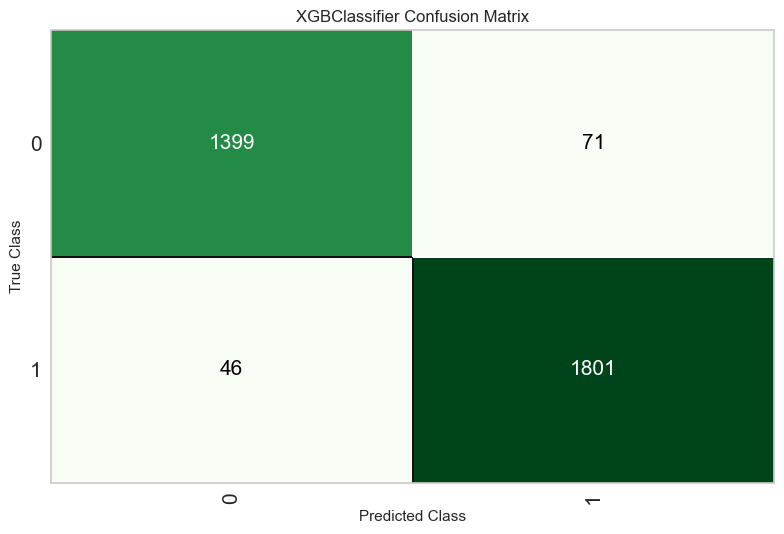

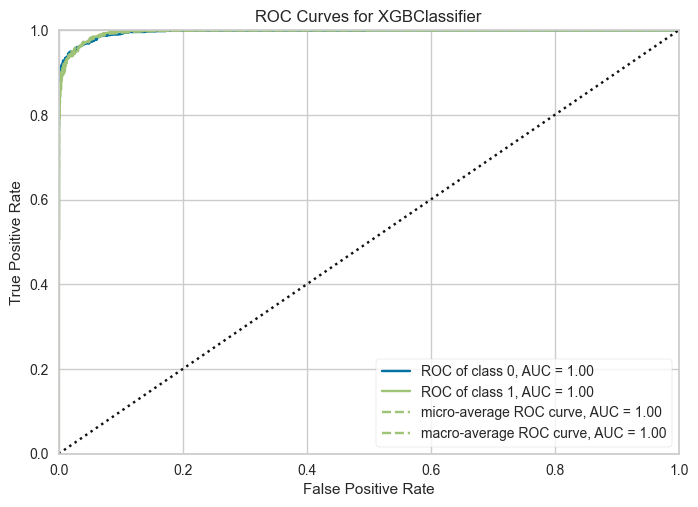

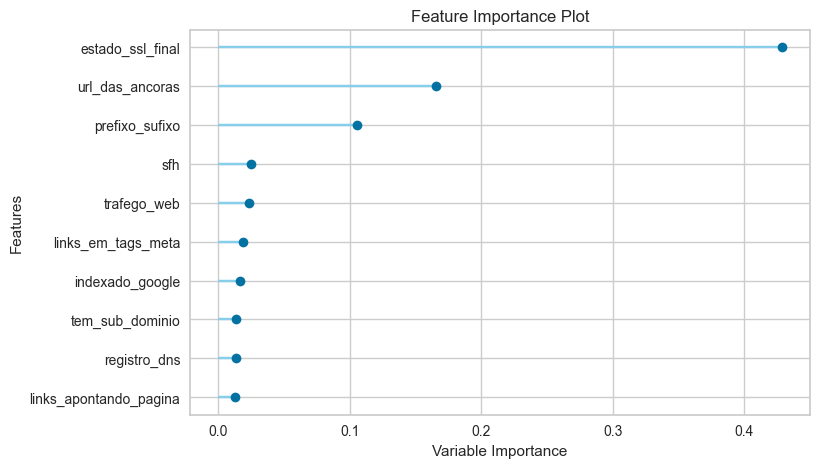

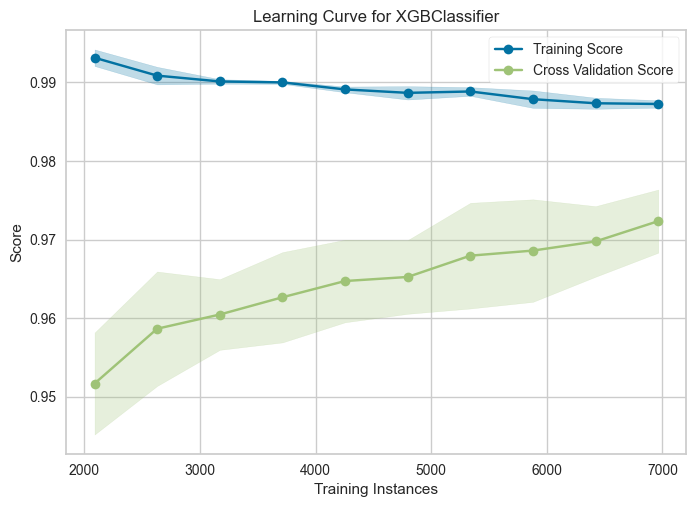

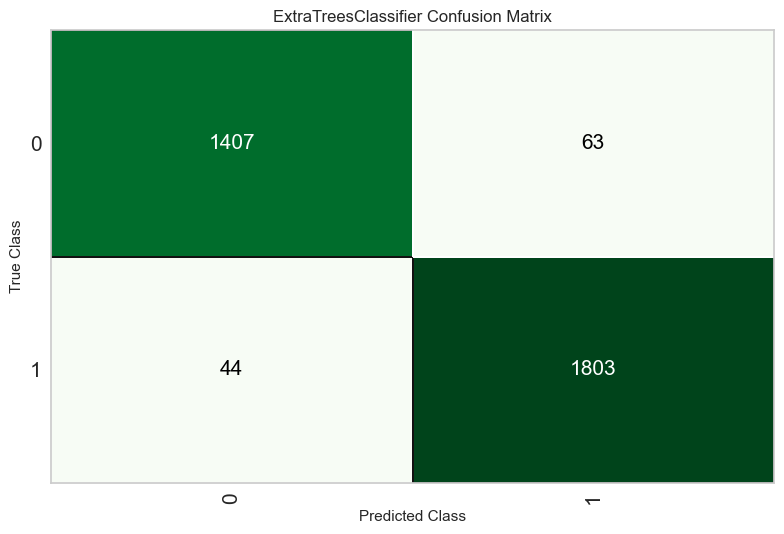

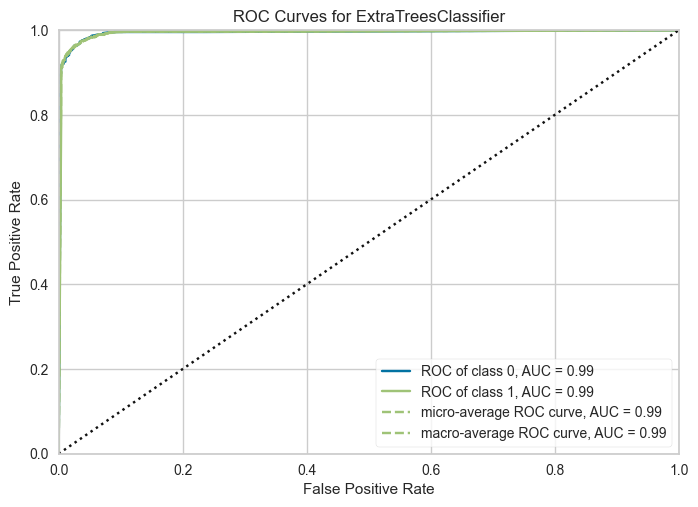

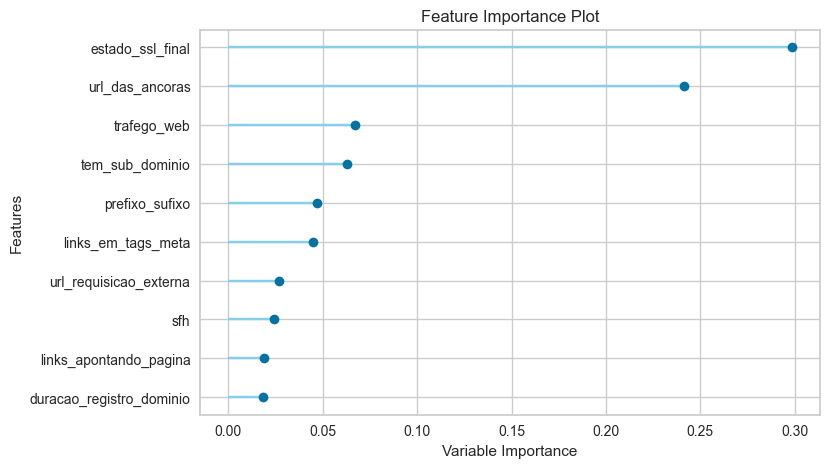

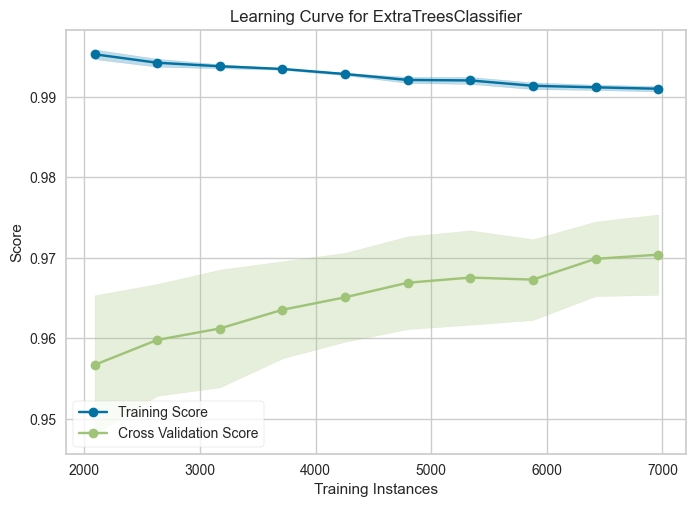

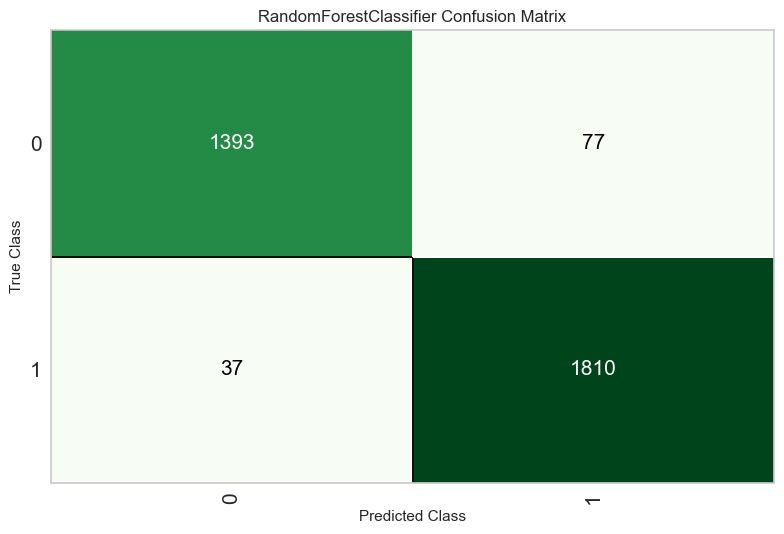

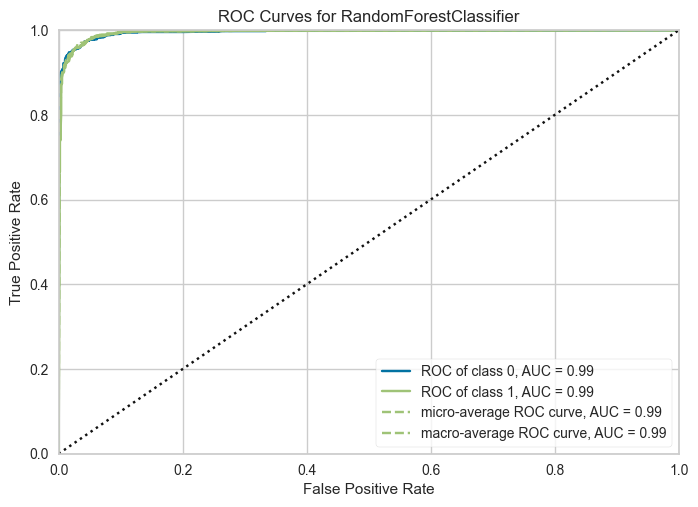

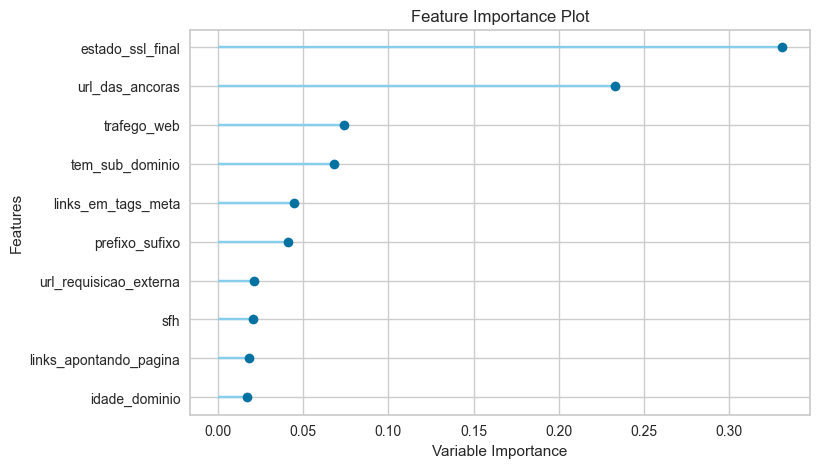

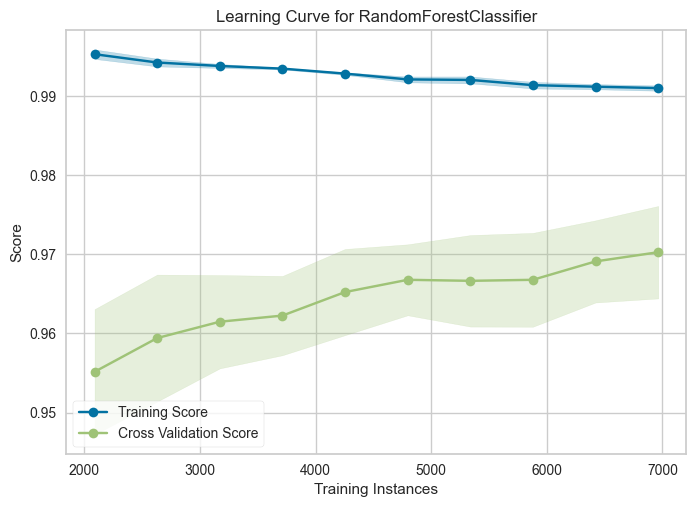

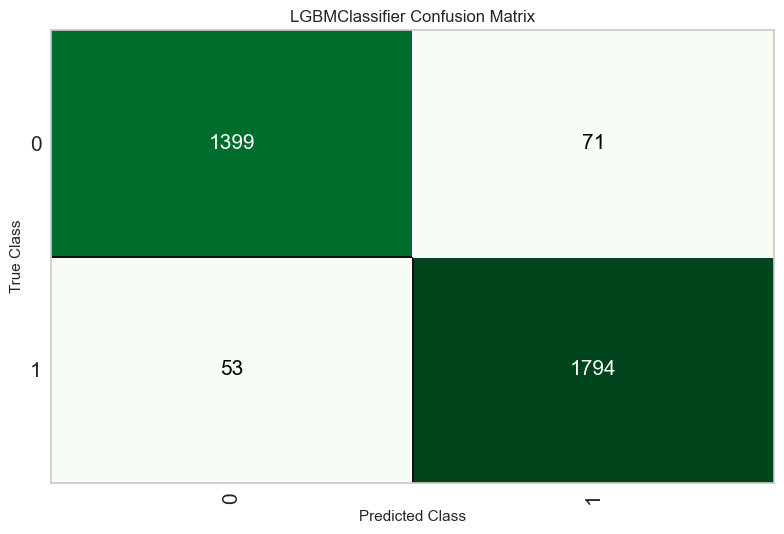

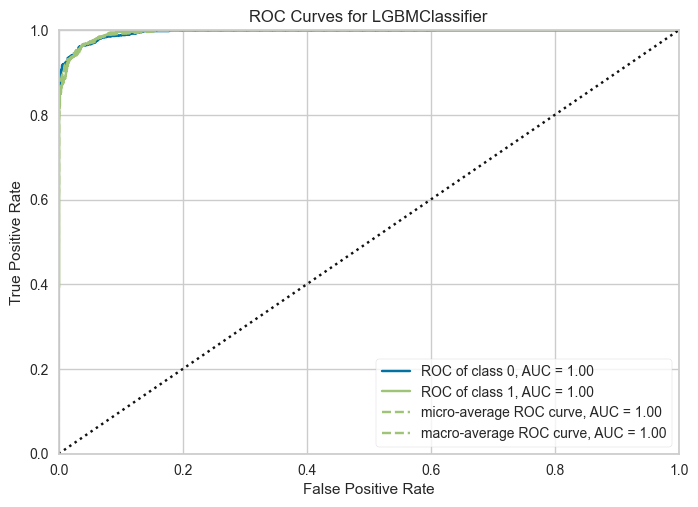

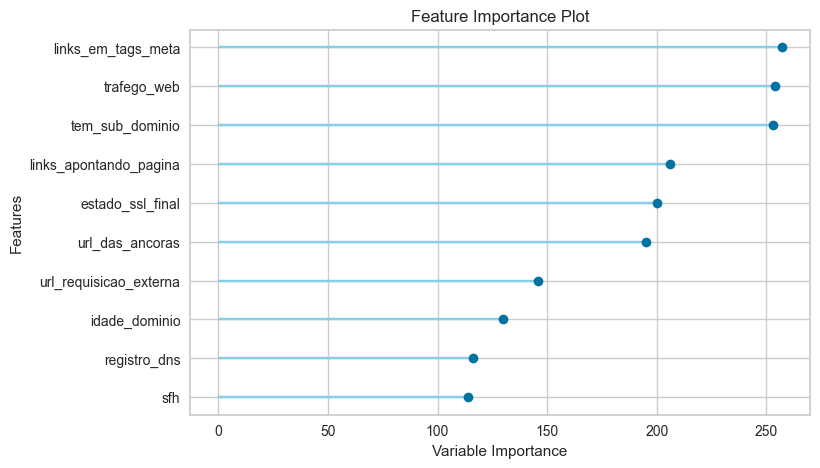

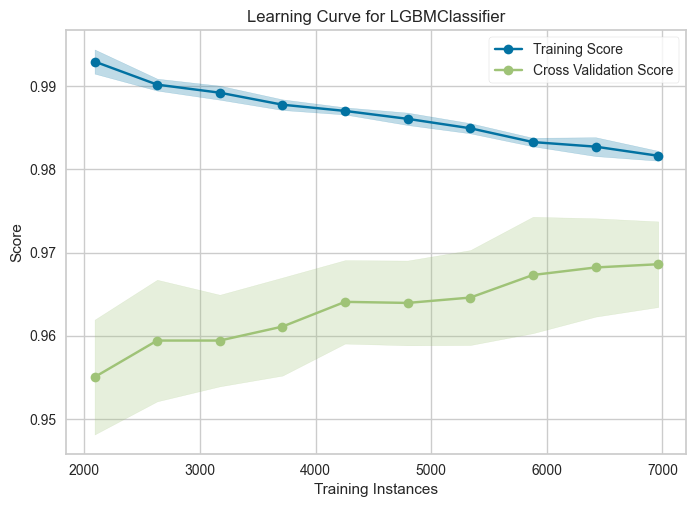

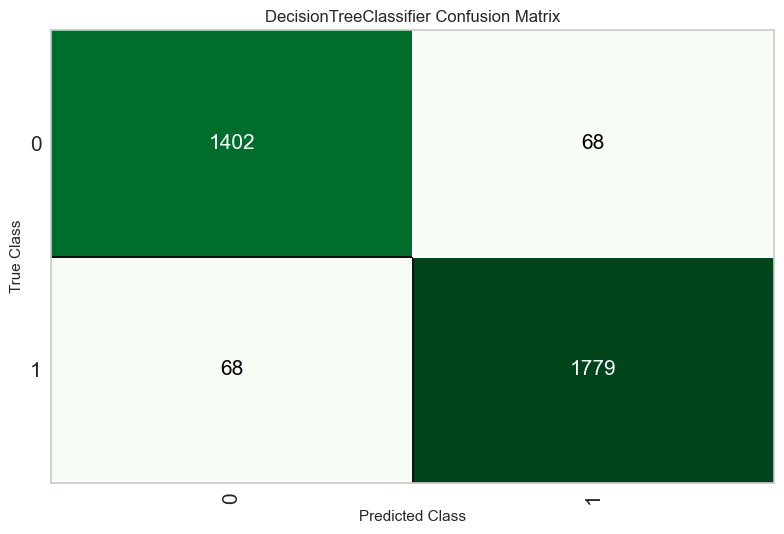

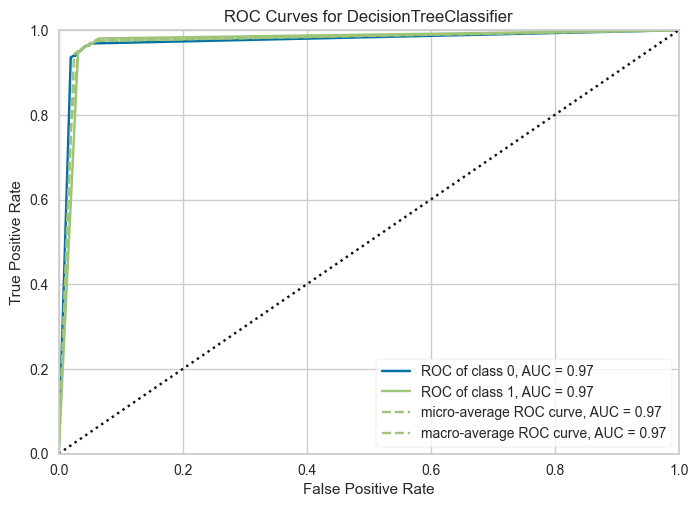

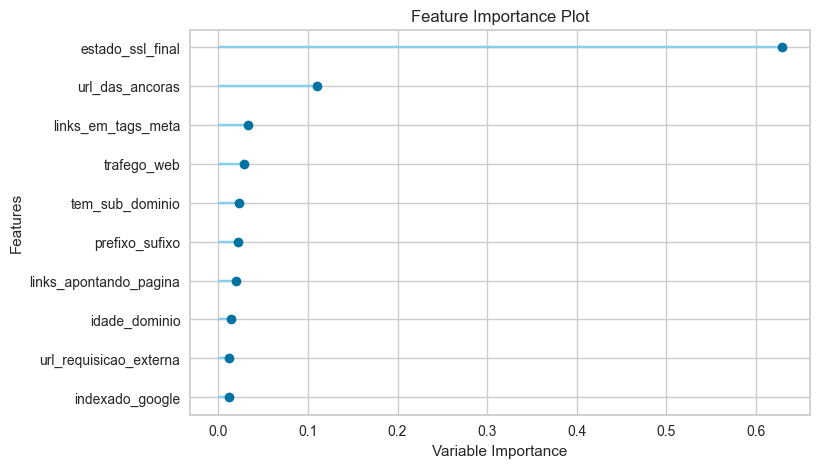

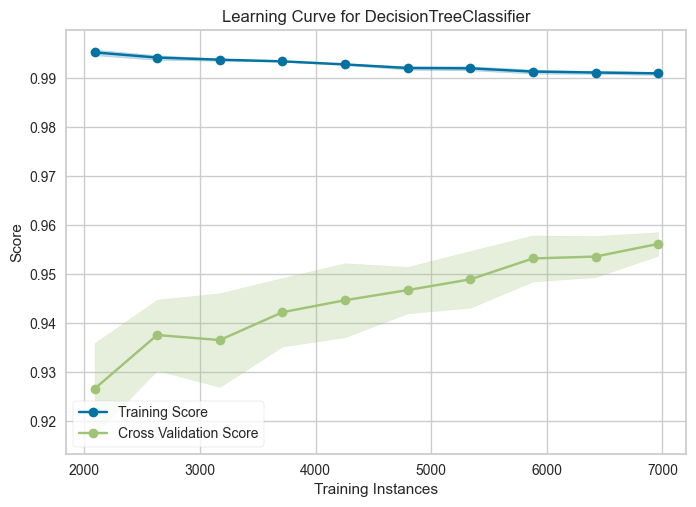

In [27]:
##ETAPA 3 : Avaliar os modelos
print("\nAvaliando os modelos...")

# Verificar se melhores_modelos existe
if 'melhores_modelos' not in globals():
    print("Erro: Execute primeiro a célula de treinamento dos modelos (compare_models)")
else:
    for modelo in melhores_modelos:
        plot_model(modelo, plot = 'confusion_matrix') ##gera matriz de confusão
        plot_model(modelo, plot = 'auc') ## gera gráfico AUC
        plot_model(modelo, plot = 'feature') ## gera gráfico de importância das features
        plot_model(modelo, plot = 'learning') ## gera gráfico de aprendizado

In [28]:
##ETAPA 4 : Começar o processo de ensemble
print("Iniciando processo de ensemnle")
supermodelo = blend_models(estimator_list=melhores_modelos, method='soft') ##soft voting == uso os modelos que tem maior taxa de precisão para se é phising ou não
##estimator_list == lista os modelos que serão usados


##resultados do ensemble
print("Resultados do ensemble:")
print(pull())


Iniciando processo de ensemnle


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9664,0.9967,0.9664,0.9667,0.9664,0.9321,0.9323
1,0.9690,0.9951,0.9690,0.9690,0.9690,0.9371,0.9371
2,0.9677,0.9961,0.9677,0.9679,0.9677,0.9344,0.9346
3,0.9716,0.9952,0.9716,0.9716,0.9716,0.9424,0.9424
4,0.9819,0.9982,0.9819,0.9819,0.9819,0.9634,0.9634
5,0.9742,0.9986,0.9742,0.9751,0.9741,0.9474,0.9484
6,0.9729,0.9943,0.9729,0.9729,0.9729,0.9450,0.9450
7,0.9729,0.9958,0.9729,0.9730,0.9728,0.9449,0.9451
8,0.9625,0.9955,0.9625,0.9626,0.9624,0.9238,0.9240


Resultados do ensemble:
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9664  0.9967  0.9664  0.9667  0.9664  0.9321  0.9323
1       0.9690  0.9951  0.9690  0.9690  0.9690  0.9371  0.9371
2       0.9677  0.9961  0.9677  0.9679  0.9677  0.9344  0.9346
3       0.9716  0.9952  0.9716  0.9716  0.9716  0.9424  0.9424
4       0.9819  0.9982  0.9819  0.9819  0.9819  0.9634  0.9634
5       0.9742  0.9986  0.9742  0.9751  0.9741  0.9474  0.9484
6       0.9729  0.9943  0.9729  0.9729  0.9729  0.9450  0.9450
7       0.9729  0.9958  0.9729  0.9730  0.9728  0.9449  0.9451
8       0.9625  0.9955  0.9625  0.9626  0.9624  0.9238  0.9240
9       0.9690  0.9955  0.9690  0.9693  0.9689  0.9368  0.9373
Mean    0.9708  0.9961  0.9708  0.9710  0.9708  0.9407  0.9410
Std     0.0050  0.0013  0.0050  0.0050  0.0050  0.0101  0.0101


In [29]:
##Etapa 5 : Avaliar o modelo final
print("Avaliando o modelo final...")
print("Uso de sites antes não vistos...")

resultados_finais = predict_model(supermodelo)

print("Resultados finais:")
print(resultados_finais)

Avaliando o modelo final...
Uso de sites antes não vistos...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9662,0.9969,0.9662,0.9663,0.9662,0.9315,0.9316


Resultados finais:
       tem_endereco_ip  comprimento_url  servico_encurtamento  \
7452                -1                1                     1   
2243                -1               -1                    -1   
10202               -1               -1                     1   
6006                 1               -1                     1   
2080                 1                1                     1   
...                ...              ...                   ...   
2620                 1               -1                     1   
4873                 1               -1                     1   
3394                 1               -1                     1   
700                  1               -1                     1   
228                 -1               -1                    -1   

       tem_simbolo_arroba  redirecionamento_barra_dupla  prefixo_sufixo  \
7452                    1                             1              -1   
2243                    1                         

Análise gráfica do modelo final...


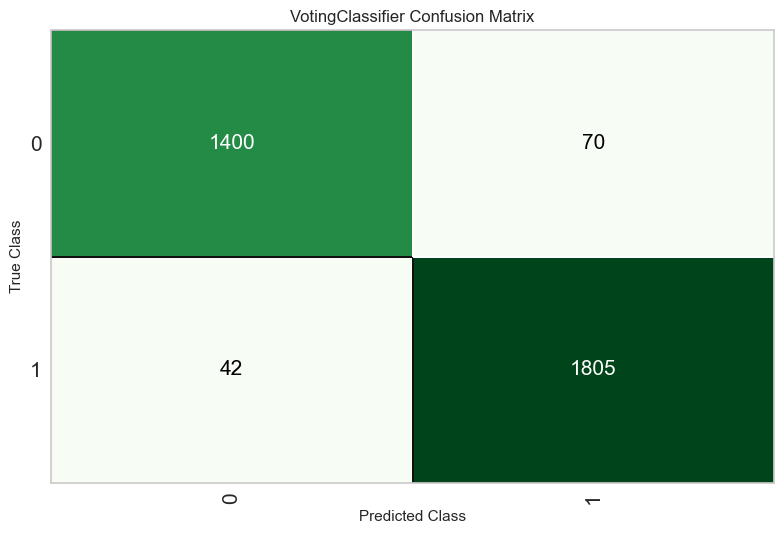

In [30]:
##Etapa 6 : Analise gráfica do modelo final
print("Análise gráfica do modelo final...")
 
plot_model(supermodelo, plot = 'confusion_matrix') ##gera matriz de confusão


SuperModelo extra...
Uso dos 2 melhores individuais apenas para ciração de um supermodelo
Iniciando processo de ensemnle


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9703,0.9963,0.9703,0.9706,0.9703,0.9400,0.9402
1,0.9729,0.9951,0.9729,0.9729,0.9728,0.9449,0.9450
2,0.9742,0.9967,0.9742,0.9742,0.9741,0.9476,0.9476
3,0.9742,0.9959,0.9742,0.9742,0.9742,0.9476,0.9476
4,0.9832,0.9983,0.9832,0.9832,0.9832,0.9660,0.9660
5,0.9793,0.9987,0.9793,0.9799,0.9793,0.9579,0.9586
6,0.9742,0.9951,0.9742,0.9742,0.9742,0.9476,0.9476
7,0.9729,0.9959,0.9729,0.9729,0.9729,0.9450,0.9450
8,0.9638,0.9961,0.9638,0.9638,0.9637,0.9264,0.9266


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9686,0.9971,0.9686,0.9688,0.9686,0.9363,0.9365


Resultados finais:
       tem_endereco_ip  comprimento_url  servico_encurtamento  \
7452                -1                1                     1   
2243                -1               -1                    -1   
10202               -1               -1                     1   
6006                 1               -1                     1   
2080                 1                1                     1   
...                ...              ...                   ...   
2620                 1               -1                     1   
4873                 1               -1                     1   
3394                 1               -1                     1   
700                  1               -1                     1   
228                 -1               -1                    -1   

       tem_simbolo_arroba  redirecionamento_barra_dupla  prefixo_sufixo  \
7452                    1                             1              -1   
2243                    1                         

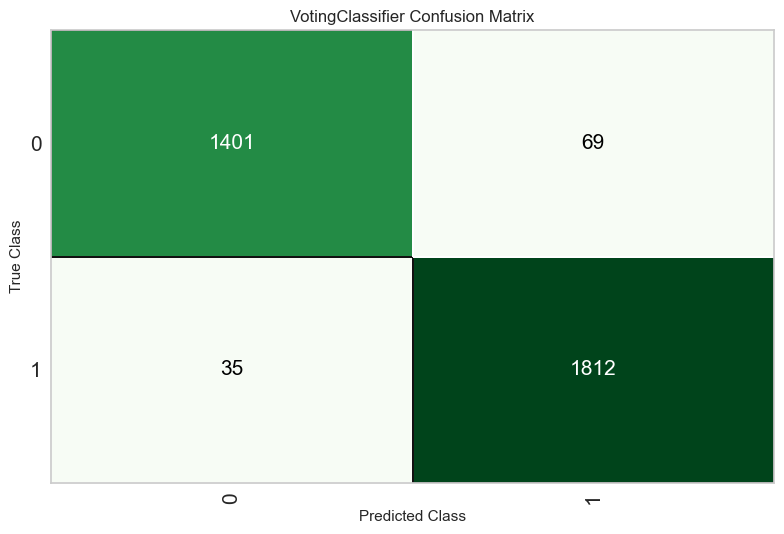

In [31]:
##Etapa extra : SuperModelo extra
print("SuperModelo extra...")
print("Uso dos 2 melhores individuais apenas para ciração de um supermodelo")
print("Iniciando processo de ensemnle")

supermodelo_extra = blend_models(estimator_list = melhores_modelos[0:2],method= 'soft')

resultados_finais_extra = predict_model(supermodelo_extra)
print("Resultados finais:")
print(resultados_finais_extra)

plot_model(supermodelo_extra, plot = 'confusion_matrix') ##gera matriz de confusão


In [32]:
print("Melhor fusão : Modelo a partir dos 2 melhores individuais")


Melhor fusão : Modelo a partir dos 2 melhores individuais
